# **Programing Exam 2 Paul Ortiz**

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import skimage
from skimage import exposure
from skimage import transform
from skimage import color

# **(a) Problem set up:**


## **Part a-i:** In this section I read in the varibles and print out the size as well as the intensity ranges for each 

Dimensions=  (1024, 1024, 3)
Red =  0 - 255 , Green =  0 - 255 , Blue =  0 - 255


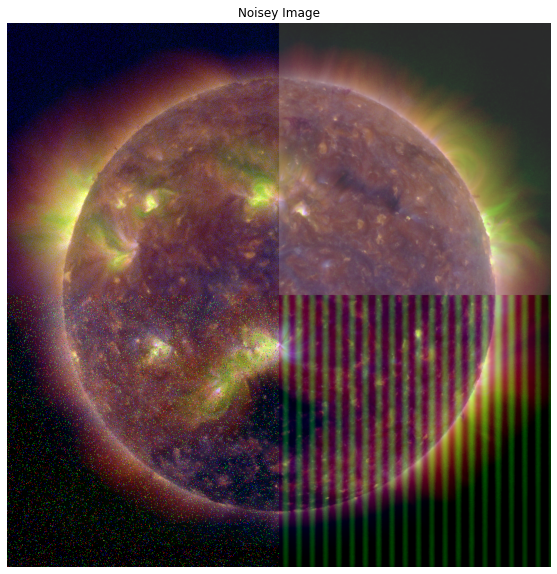

In [ ]:
I = mpimg.imread("EE446_596_PE2_image.tiff")
plt.figure(figsize=(10,10))
plt.title("Noisey Image")
img=plt.imshow((I).astype(np.uint8)); plt.axis('off')
print("Dimensions= ", np.shape(I))
red = I[:,:,0]
green = I[:,:,1] 
blue = I[:,:,2]
print("Red = ", np.min(red), "-", np.max(red), ", Green = ", np.min(green), "-", np.max(green),", Blue = ", np.min(blue), "-",np.max(blue))


The dimesions are 1024,1024,3, which checks out becuase the resolution of the image is 1024*1024 and there are 3 channels for red, green, and blue.

## ***Part a-ii:*** In this section I read in each of the quadrents into a seperate varible by indexing the image into fourths and placing each quater into their respective varibles. 

(-0.5, 511.5, 511.5, -0.5)

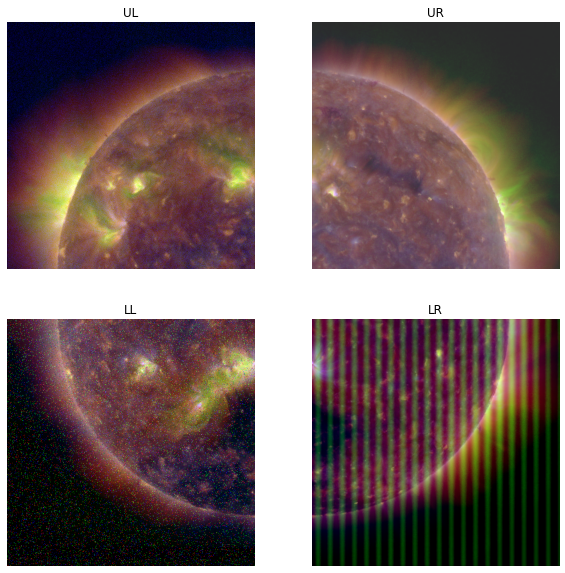

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
I_UL = I[0:512,0:512]
plt.title("UL")
img=plt.imshow((I_UL).astype(np.uint8)); plt.axis('off')
plt.subplot(2,2,2)
plt.title("UR")
I_UR = I[0:512,512:1024]
img=plt.imshow((I_UR).astype(np.uint8)); plt.axis('off')
plt.subplot(2,2,3)
plt.title("LL")
I_LL = I[512:1024,0:512]
img=plt.imshow((I_LL).astype(np.uint8)); plt.axis('off')
plt.subplot(2,2,4)
plt.title("LR")
I_LR = I[512:1024,512:1024]
img=plt.imshow((I_LR).astype(np.uint8)); plt.axis('off')

Each image comes out as expected

## ***Part a-iii:*** From first pass I can tell roughly what the problem is in each. The problem in UL is the blue noise that adds a tint to the image. In the UR the image's color is washed out and very saturated, but other than that it looks pretty normal. The LL is suffering from salt and maybe pepper noise in all the RGB channels because I can see hot red green and blue pixels. The bottom right is suffering from periodic noise in the green channel due to the periodic bars that appear in the image. 

# **(b) Upper Left Quadrant:**

In [ ]:
Ig = mpimg.imread("EE446_596_PE2_examplecleanimage.tiff")
Ig_UL = Ig[0:512,0:512]
Ig_UR = Ig[0:512,512:1024]
Ig_UL_R = Ig_UL[:,:,0]
Ig_UL_G = Ig_UL[:,:,1] 
Ig_UL_B  = Ig_UL[:,:,2]
# plt.figure(figsize=(10,15))
# plt.subplot(3,2,1)
# img=plt.imshow((Ig_UL_R).astype(np.uint8)); plt.axis('off')
# plt.subplot(3,2,2)
# hist=plt.hist(Ig_UL_R.flatten(),bins=256,range=(0,255))
# plt.subplot(3,2,3)
# img=plt.imshow((Ig_UL_G).astype(np.uint8)); plt.axis('off')
# plt.subplot(3,2,4)
# hist=plt.hist(Ig_UL_G.flatten(),bins=256,range=(0,255))
# plt.subplot(3,2,5)
# img=plt.imshow((Ig_UL_B).astype(np.uint8)); plt.axis('off')
# plt.subplot(3,2,6)
# hist=plt.hist(Ig_UL_B.flatten(),bins=256,range=(0,255))

In [ ]:
def arithmetic_mean_filter(f,nsize):
  nsize2 = int((nsize-1)/2)
  M,N = f.shape
  fpad = np.pad(f,(int(nsize/2+1),int(nsize/2+1)),mode='mean')
  

  fhat = np.zeros((M,N))
  fhat = fhat.astype(int)
  for m in np.arange(0,M):
    for n in np.arange(0,N):
      Sxy = fpad[m:m+nsize,n:n+nsize]
      fhat[m,n] = Sxy.sum()/(nsize*nsize)


  return fhat


In [ ]:
def midpoint_filter(f,nsize):
  nsize2 = int((nsize-1)/2)
  M,N = f.shape
  fpad = np.pad(f,(int(nsize/2+1),int(nsize/2+1)),mode='mean')
  fpad = fpad.astype(int)
  fhat = np.zeros((M,N))
  fhat = fhat.astype(int)
  for m in np.arange(0,M):
    for n in np.arange(0,N):
      Sxy = fpad[m:m+nsize,n:n+nsize]
      fhat[m,n] =0.5* (np.max(Sxy)+np.min(Sxy))

  return fhat


In [ ]:
def min_filter(f,nsize):
  nsize2 = int((nsize-1)/2)
  M,N = f.shape
  fpad = np.zeros((M+nsize2*2,N+nsize2*2))
  fpad[nsize2:-nsize2,nsize2:-nsize2] = f
  fhat = np.zeros((M,N))
  for m in np.arange(0,M):
    for n in np.arange(0,N):
      Sxy = fpad[m:m+nsize+1,n:n+nsize+1]

      fhat[m,n] = np.min(Sxy)
  return fhat

In [ ]:
def median_filter(f,nsize):
  nsize2 = int((nsize-1)/2)
  M,N = f.shape
  fpad = np.zeros((M+nsize2*2,N+nsize2*2))
  fpad[nsize2:-nsize2,nsize2:-nsize2] = f
  fhat = np.zeros((M,N))
  for m in np.arange(0,M):
    for n in np.arange(0,N):
      Sxy = fpad[m:m+nsize+1,n:n+nsize+1]
      
      fhat[m,n] = np.median(Sxy)
  return fhat

In [ ]:
def geometric_mean_filter(f,nsize):
  nsize2 = int((nsize-1)/2)
  M,N = f.shape
  fpad = np.pad(f,(int(nsize/2+1),int(nsize/2+1)),mode='mean')
  fpad = fpad.astype(int)
  fhat = np.zeros((M,N))
  fhat = fhat.astype(int)
  for m in np.arange(0,M):
    for n in np.arange(0,N):
      Sxy = fpad[m:m+nsize,n:n+nsize]
      fhat[m,n] = (Sxy**(1/(nsize*nsize))).prod()
  return fhat


## ***Part b-i:*** In this section I plot the R, G, and B channel and their histogram in a subplot with the plot and hist command. I seperate the RGB channels with indexing. Above are some filters I tested to see what effect they have. I modified them to have a mean pad because it made the edges of the image play nice with each other. 

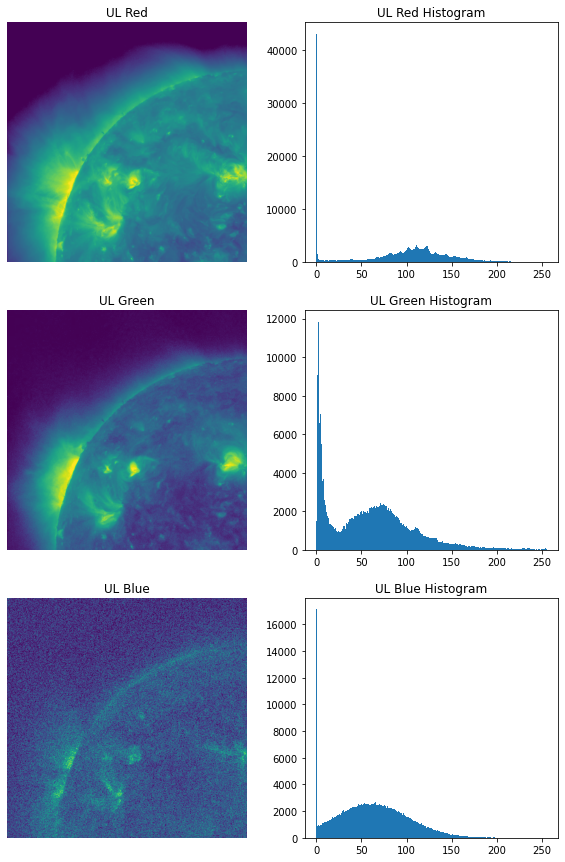

In [ ]:
I = mpimg.imread("EE446_596_PE2_image.tiff")
I_UL = I[0:512,0:512]

plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
I_UL_R = I_UL[:,:,0]
I_UL_G = I_UL[:,:,1] 
I_UL_B  = I_UL[:,:,2]
plt.title("UL Red")
img=plt.imshow((I_UL_R).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,2)
plt.title("UL Red Histogram")
hist=plt.hist(I_UL_R.flatten(),bins=256,range=(0,255))
plt.subplot(3,2,3)
plt.title("UL Green")
img=plt.imshow((I_UL_G).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,4)
plt.title("UL Green Histogram")
hist=plt.hist(I_UL_G.flatten(),bins=256,range=(0,255))
plt.subplot(3,2,5)
plt.title("UL Blue")
img=plt.imshow((I_UL_B).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,6)
plt.title("UL Blue Histogram")
hist=plt.hist(I_UL_B.flatten(),bins=256,range=(0,255))



## ***Part b-ii:*** In this section I analyize each channel to determine the source of the noise. I'll start by splitting them apart and explaning each seperatly.

### ***UL Red:*** This channel looks absent of noise. The homgenous regions are clear and I can't see any evidence of noise

### ***UL Green:*** This channel has some noise, but upon inspecting the clean image there is also this green noise around the edge of the sun, so it is either a sensor error or other factors outside the noise applied to this image. 

### ***UL Blue:*** This noise has a heavy amount of guassian noise. Inspecting the histogram gave me the impression that the image was being effected by two distrobutions adding up and creating a dome like shape around them. To see what was happining I ran the channel through a arithmetic mean filter printed below. My though was that this average would better seprate these two peaks due to averaging the noise. I chose a size of 9 to make sure I spereated the peaks enough.

Text(0.5, 1.0, 'Filtered UL B histogram')

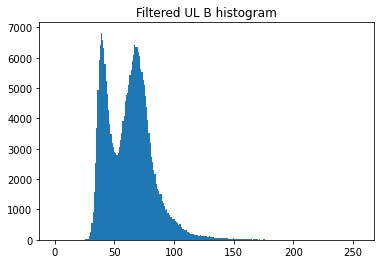

In [ ]:
I_UL_B_Restored = arithmetic_mean_filter(I_UL_B,9) 

I_UL_B_Restored=I_UL_B_Restored
hist=plt.hist(I_UL_B_Restored.flatten(),bins=256,range=(0,255))
plt.title('Filtered UL B histogram')

From the histogram I saw that my theory was correct, it looks like there are two conflicting impulse, and one is likely to contain the noise in the image especially in the background. 

## ***Part b-iii:*** In this section I use some techniques to remove the noise in the blue channel. I started by looking at what the arithemtic mean filter did to the image. From the histogram I can see that the image does not have any values below about 25, so I know for a fact the image is going to look strange.

(-0.5, 511.5, 511.5, -0.5)

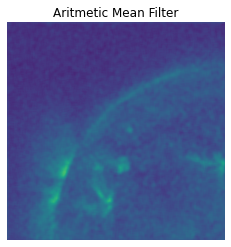

In [ ]:
plt.title("Aritmetic Mean Filter")
img=plt.imshow(I_UL_B_Restored.astype(np.uint8),vmin=0,vmax=255); plt.axis('off')


Sure enough is looks like the image is still noisey, and there is no black, which I know the homogenous background of this image will have from inspecting the clean image. I need to do something else. From the histogram I wanted to see what happened when I removed the peak to the left. I could accomplish this by thresholding the values that are in the range of the peak.

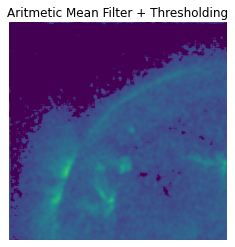

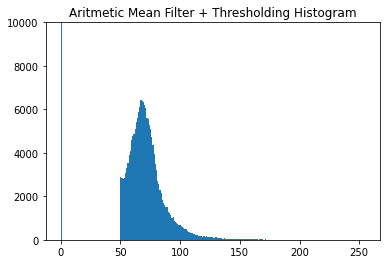

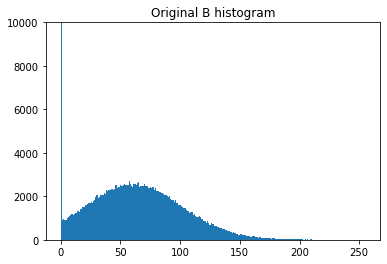

In [ ]:
I_UL_B_Restored = np.zeros(np.shape(I_UL_B))
I_UL_B_Restored1 = np.zeros(np.shape(I_UL_B))

I_UL_B_Restored = arithmetic_mean_filter(I_UL_B,9) 


i = np.where(I_UL_B_Restored < 50)
I_UL_B_Restored[i] = 0


# I_UL_B_Restored1 = np.zeros(np.shape(I_UL_B))
# I_UL_B_Restored1[i]= I_UL_B_Restored[i]
# print(I_UL_B_Restored1[i])
# blank = np.zeros(np.shape(I_UL_B))
# print((I_UL_B_Restored1))
# i = np.where(I_UL_B_Restored1 > 0)
# randy = 5*np.random.randn(512,512)+65
# blank[i] = randy[i]

I_UL_B_Restored=I_UL_B_Restored


plt.title("Aritmetic Mean Filter + Thresholding")
img=plt.imshow(I_UL_B_Restored.astype(np.uint8),vmin=0,vmax=255); plt.axis('off')

plt.figure()
plt.title("Aritmetic Mean Filter + Thresholding Histogram")
plt.axis(ymax = 10000)
hist=plt.hist(I_UL_B_Restored.flatten(),bins=256,range=(0,255))

plt.figure()
plt.axis(ymax = 10000)

plt.title("Original B histogram")
hist=plt.hist(I_UL_B.flatten(),bins=256,range=(0,255))


The image came out with much less noise. This is much more obvious in the dark parts of the image which are almost complelty black with some small patches of noise here and there. While I think the result is good, there are some artifacts in the image due to harsh thresholding.

## **Part b-iv:** In this section I stitch the image together in each channel.

(-0.5, 511.5, 511.5, -0.5)

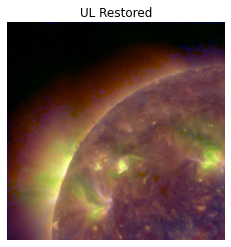

In [ ]:
I_UL_restored = np.zeros([512,512,3])
I_UL_restored[:,:,0]= I_UL_R
I_UL_restored[:,:,1]= I_UL_G
I_UL_restored[:,:,2]= I_UL_B_Restored
plt.title("UL Restored")
img=plt.imshow((I_UL_restored).astype(np.uint8)); plt.axis('off')


The color is good, some errors and artifacts here and there due to the thresholding.

# **(c) Upper right quadrant:**

## ***Part c-i:*** In this section I seperate the channels and plot their histograms in a subplot. 

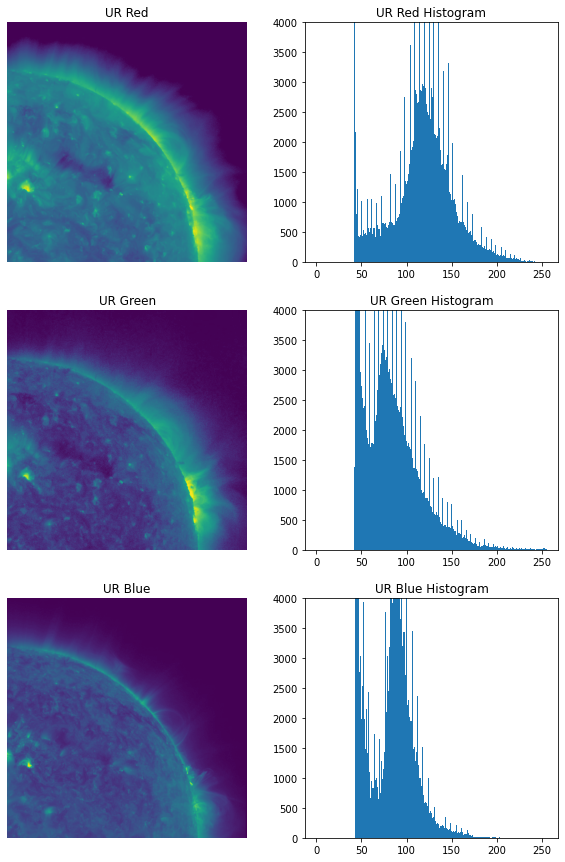

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
I_UR_R = I_UR[:,:,0]
I_UR_G = I_UR[:,:,1] 
I_UR_B  = I_UR[:,:,2]
plt.title("UR Red")
img=plt.imshow((I_UR_R).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,2)
plt.axis(ymax = 4000)
plt.title("UR Red Histogram")
hist=plt.hist(I_UR_R.flatten(),bins=256,range=(0,255))
plt.subplot(3,2,3)
plt.title("UR Green")
img=plt.imshow((I_UR_G).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,4)
plt.axis(ymax = 4000)
plt.title("UR Green Histogram")
hist=plt.hist(I_UR_G.flatten(),bins=256,range=(0,255))
plt.subplot(3,2,5)
plt.title("UR Blue")
img=plt.imshow((I_UR_B).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,6)
plt.axis(ymax = 4000)
plt.title("UR Blue Histogram")
hist=plt.hist(I_UR_B.flatten(),bins=256,range=(0,255))



## ***Part c-ii:*** In this section I analyze the image to determine the cause of the noise. From looking at the histogram above I can see that the image is shifted, which explains the washed-out nature of the noisy image's UR quadrent. There also looks like some impulsive noise causing spikes at certian instensities. I wanted to see what a known homogenous region of the image looked like so I took some strips. 

42
42
43


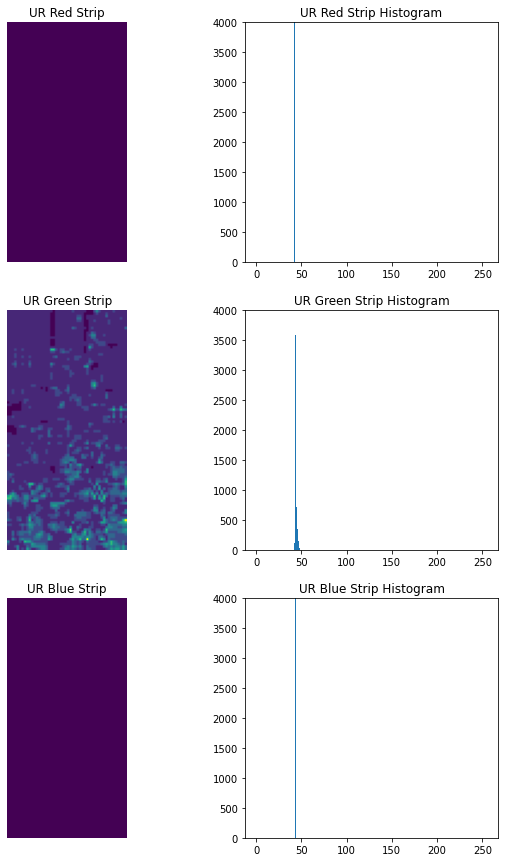

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
I_UR_R = I_UR[:,:,0]
I_UR_G = I_UR[:,:,1] 
I_UR_B  = I_UR[:,:,2]
plt.title("UR Red Strip")
img=plt.imshow((I_UR_R[0:100,512-50:512]).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,2)
plt.axis(ymax = 4000)
plt.title("UR Red Strip Histogram")
hist=plt.hist(I_UR_R[0:100,512-50:512].flatten(),bins=256,range=(0,255))
plt.subplot(3,2,3)
plt.title("UR Green Strip")
img=plt.imshow((I_UR_G[0:100,512-50:512]).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,4)
plt.axis(ymax = 4000)
plt.title("UR Green Strip Histogram")
hist=plt.hist(I_UR_G[0:100,512-50:512].flatten(),bins=256,range=(0,255))
plt.subplot(3,2,5)
plt.title("UR Blue Strip")
img=plt.imshow((I_UR_B[0:100,512-50:512]).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,6)
plt.axis(ymax = 4000)
plt.title("UR Blue Strip Histogram")
hist=plt.hist(I_UR_B[0:100,512-50:512].flatten(),bins=256,range=(0,255))
print(np.min(I_UR_R))
print(np.min(I_UR_G))
print(np.min(I_UR_B))

### ***UR Red:*** Looks like all values are pegged to a value around 40 to 45 depsite the values needing to be at zero to match with the rest of the image, as well as the restored image. Other than that there is no evidence of noise.

### ***UR Green:*** Looks like all values are pegged to a value around 40 to 45 depsite the values needing to be at zero to match with the rest of the image, as well as the restored image. There is the green noise that was in all the other images so that can stay.

### ***UR Blue:*** Looks like all values are pegged to a value around 45 to 50 depsite the values needing to be at zero to match with the rest of the image, as well as the restored image. Other than that there is no evidence of noise.

## **Part c-iii:** In this section I attempt to restore the image with techniques that we learned in class. I saw that the histogram was shifted by a value, so I first found what the minmum of this image is because it represents how much the image has been shifted. I then subratcted this value from the image. There is still some impulsive noise, so I decided to also run it through an arithmetic mean filter to attempt to reduce it. 

(-0.5, 511.5, 511.5, -0.5)

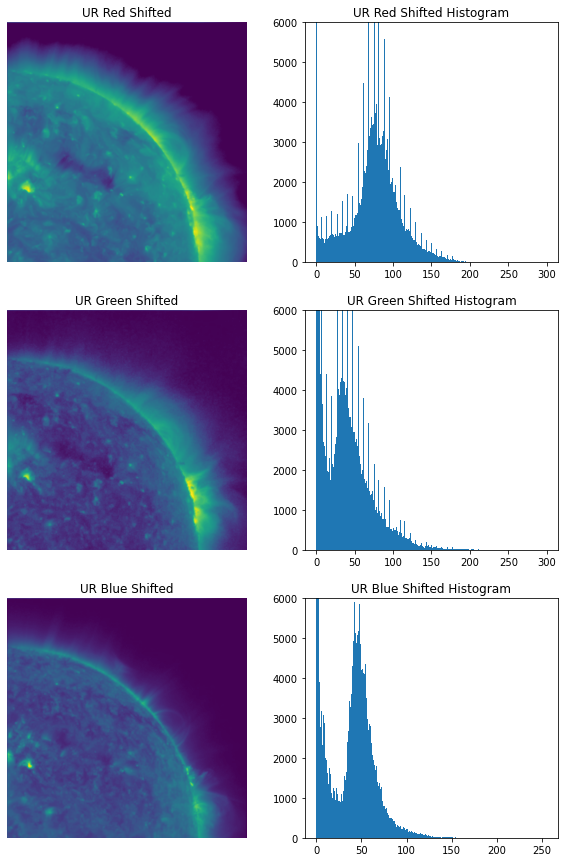

In [ ]:
plt.figure(figsize=(10,15))


I_UR_R_Restored = np.zeros(np.shape(I_UR_R))


I_UR_R_Restored = (I_UR_R - np.min(I_UR_R))
I_UR_R_Restored = arithmetic_mean_filter(I_UR_R_Restored,3)



plt.subplot(3,2,2)
plt.axis(ymax = 6000)
plt.title("UR Red Shifted Histogram")
hist1=plt.hist((I_UR_R_Restored).flatten(),bins=256,range=(0,300))

plt.subplot(3,2,1)
plt.title("UR Red Shifted")
img=plt.imshow((I_UR_R_Restored).astype(np.uint8)); plt.axis('off')


I_UR_G_Restored = np.zeros(np.shape(I_UR_G))
I_UR_G_Restored = (I_UR_G-np.min(I_UR_G))
I_UR_G_Restored = midpoint_filter(I_UR_G_Restored,3)




plt.subplot(3,2,4)
plt.axis(ymax = 6000)
plt.title("UR Green Shifted Histogram")
hist2=plt.hist((I_UR_G_Restored).flatten(),bins=256,range=(0,300))

plt.subplot(3,2,3)
plt.title("UR Green Shifted")
img=plt.imshow((I_UR_G_Restored).astype(np.uint8)); plt.axis('off')


I_UR_B_Restored = np.zeros(np.shape(I_UR_B))
I_UR_B_Restored = (I_UR_B-np.min(I_UR_B))
I_UR_B_Restored = midpoint_filter(I_UR_B_Restored,3)


plt.subplot(3,2,6)
plt.axis(ymax = 6000)
plt.title("UR Blue Shifted Histogram")
hist3=plt.hist((I_UR_B_Restored).flatten(),bins=256,range=(0,255))
plt.subplot(3,2,5)
plt.title("UR Blue Shifted")
img=plt.imshow((I_UR_B_Restored).astype(np.uint8)); plt.axis('off')




The origin of the histogram is now at zero, which is what I wanted to accomplish. While the arithmetic filter was able to reduce some of the noise in the red and green channel, there are still some intensities that are in disporportite amounts. The blue channel handled the filter the best with a lot of random vaules being averaged. I didn't want filter further and blur the image.

Part c-iv: In this section I stitch the image together.

(-0.5, 511.5, 511.5, -0.5)

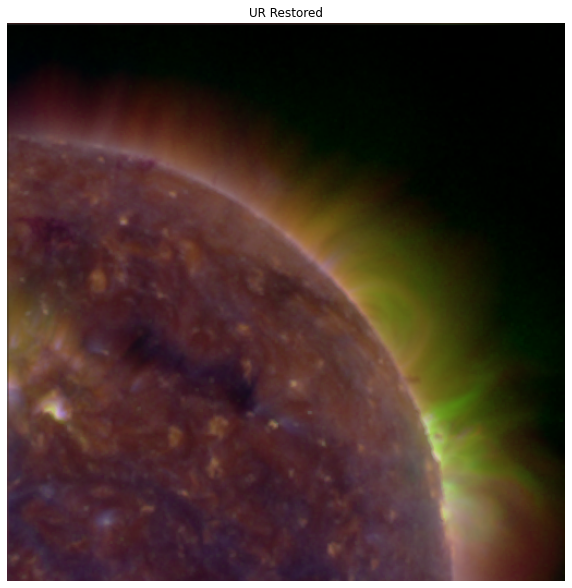

In [ ]:
plt.figure(figsize=(10,15))
I_UR_restored = np.zeros([512,512,3])
I_UR_restored[:,:,0]= I_UR_R_Restored
I_UR_restored[:,:,1]= I_UR_G_Restored
I_UR_restored[:,:,2]= I_UR_B_Restored
plt.title("UR Restored")
img=plt.imshow((I_UR_restored).astype(np.uint8)); plt.axis('off')


Looks correct, slightly darker than it needs to be.

# **(d) Lower left quadrant:**

## ***Part d-i:*** In this section  display the channels and thier histograms in a subplot

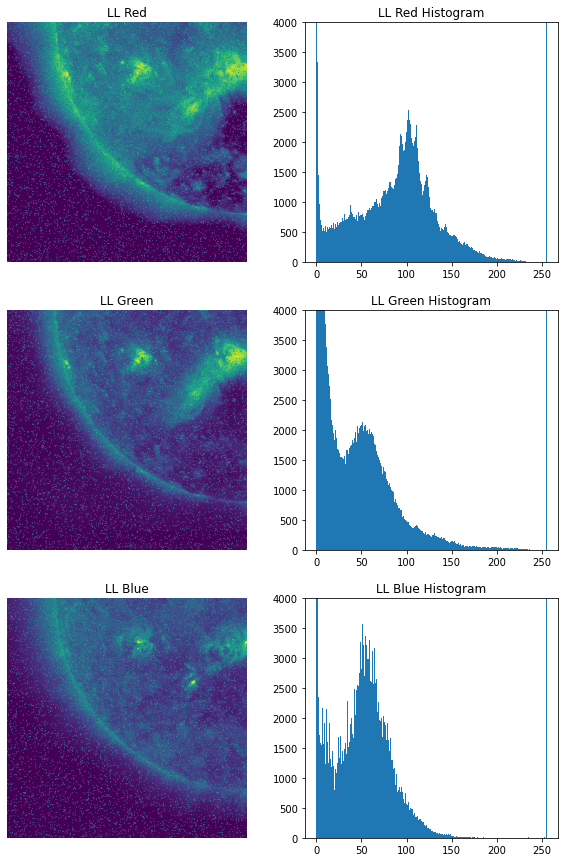

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
I_LL_R = I_LL[:,:,0]
I_LL_G = I_LL[:,:,1] 
I_LL_B  = I_LL[:,:,2]
plt.title("LL Red")
img=plt.imshow((I_LL_R).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,2)
plt.axis(ymax = 4000)
plt.title("LL Red Histogram")
hist=plt.hist(I_LL_R.flatten(),bins=256,range=(0,255))
plt.subplot(3,2,3)
plt.title("LL Green")
img=plt.imshow((I_LL_G).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,4)
plt.axis(ymax = 4000)
plt.title("LL Green Histogram")
hist=plt.hist(I_LL_G.flatten(),bins=256,range=(0,255))
plt.subplot(3,2,5)
plt.title("LL Blue")
img=plt.imshow((I_LL_B).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,6)
plt.axis(ymax = 4000)
plt.title("LL Blue Histogram")
hist=plt.hist(I_LL_B.flatten(),bins=256,range=(0,255))


## ***Part d-ii:*** The first thing that jumped out a me was the abundance of salt noise. I was able to see that in my intial anaysis and from the histograms, but I also wanted to check up close to see if there is some pepper noise. The strips and histograms are provided below.

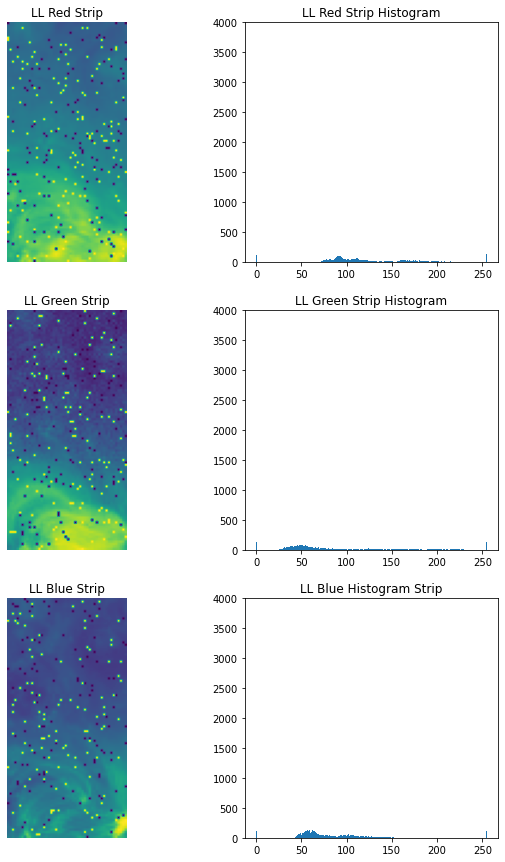

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
plt.title("LL Red Strip")
img=plt.imshow((I_LL_R[0:100,512-50:512]).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,2)
plt.axis(ymax = 4000)
plt.title("LL Red Strip Histogram")
hist=plt.hist(I_LL_R[0:100,512-50:512].flatten(),bins=256,range=(0,255))
plt.subplot(3,2,3)
plt.title("LL Green Strip")
img=plt.imshow((I_LL_G[0:100,512-50:512]).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,4)
plt.axis(ymax = 4000)
plt.title("LL Green Strip Histogram")
hist=plt.hist(I_LL_G[0:100,512-50:512].flatten(),bins=256,range=(0,255))
plt.subplot(3,2,5)
plt.title("LL Blue Strip")
img=plt.imshow((I_LL_B[0:100,512-50:512]).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,6)
plt.axis(ymax = 4000)
plt.title("LL Blue Histogram Strip")
hist=plt.hist(I_LL_B[0:100,512-50:512].flatten(),bins=256,range=(0,255))


### ***LL Red:*** As expected there is plenty of salt noise as well as some pepper noise. Salt and pepper appear to be in equal proportion from this slice of the image. 

### ***LL Green:*** As expected there is plenty of salt noise as well as some pepper noise. Salt and apper appear to be in equal proportion from this slice of the image and match the amounts in the red image. There is a bar in the bottom.

### ***LL Blue:*** As expected there is plenty of salt noise as well as some pepper noise. Salt and pepper appear to be in equal proportion from this slice of the image and match the amounts in the red and green image. There is a bar in the bottom.

## ***Part d-iii:*** In this section I restore the image. I know from experance that the median filter is the best way to deal with salt and pepper noise because values don't get skewed up and down from an out of place 0 or 255 like a arithmetic or midpoint filter would. There is a bar in the bottom.

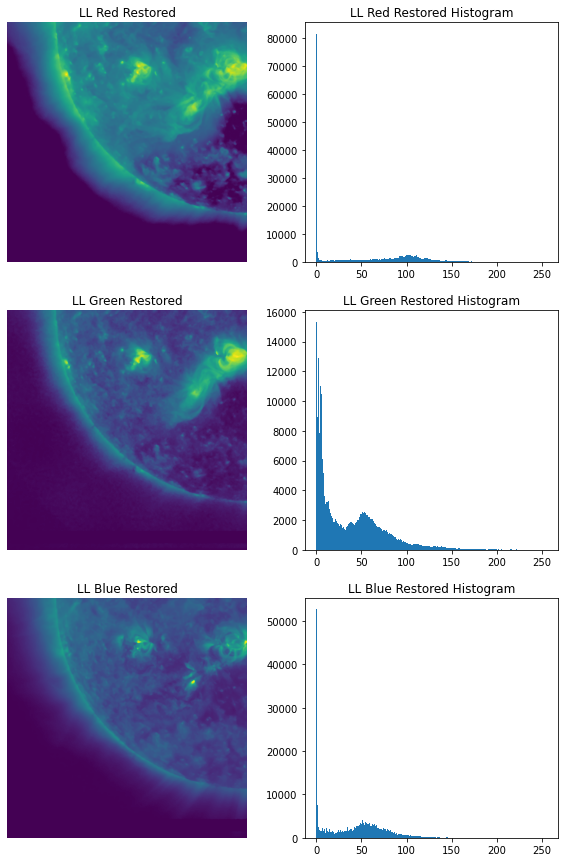

In [ ]:
plt.figure(figsize=(10,15))

I_LL_R = I_LL[:,:,0]
I_LL_G = I_LL[:,:,1] 
I_LL_B  = I_LL[:,:,2]


I_LL_R_restored = np.zeros(np.shape(I_UL_R))
I_LL_R_restored = median_filter(I_LL_R,3)

I_LL_G_restored = np.zeros(np.shape(I_UL_G))
I_LL_G_restored = median_filter(I_LL_G,3)

I_LL_B_restored = np.zeros(np.shape(I_UL_B))
I_LL_B_restored = median_filter(I_LL_B,3)

plt.subplot(3,2,1)
plt.title("LL Red Restored")
img=plt.imshow((I_LL_R_restored).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,2)
plt.title("LL Red Restored Histogram")
hist=plt.hist(I_LL_R_restored.flatten(),bins=256,range=(0,255))
plt.subplot(3,2,3)
plt.title("LL Green Restored")
img=plt.imshow((I_LL_G_restored).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,4)
plt.title("LL Green Restored Histogram")
hist=plt.hist(I_LL_G_restored.flatten(),bins=256,range=(0,255))
plt.subplot(3,2,5)
plt.title("LL Blue Restored")
img=plt.imshow((I_LL_B_restored).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,6)
plt.title("LL Blue Restored Histogram")
hist=plt.hist(I_LL_B_restored.flatten(),bins=256,range=(0,255))


The median filter was successful in removing the salt and peper noise. I know this because there are not any values pegged at 255, and the amount of zeros has been reduced greatly. The image also is absent of noise upon inspection.

## ***Part d-iv:*** In this section I stitch togehter all the channels and output the

(-0.5, 511.5, 511.5, -0.5)

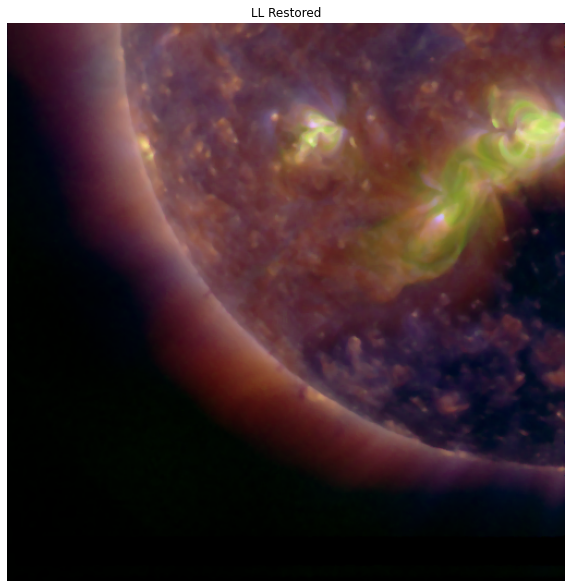

In [ ]:

I_LL_restored = np.zeros([512,512,3])
I_LL_restored[:,:,0]= I_LL_R_restored
I_LL_restored[:,:,1]= I_LL_G_restored
I_LL_restored[:,:,2]= I_LL_B_restored

plt.figure(figsize=(10,15))
plt.title("LL Restored")
img=plt.imshow((I_LL_restored).astype(np.uint8)); plt.axis('off')




This image looks great and matches the color of the upper left.

# **(e) Lower right quadrant:**


## ***Part e-i:*** In this section I plot the image and its histogram.

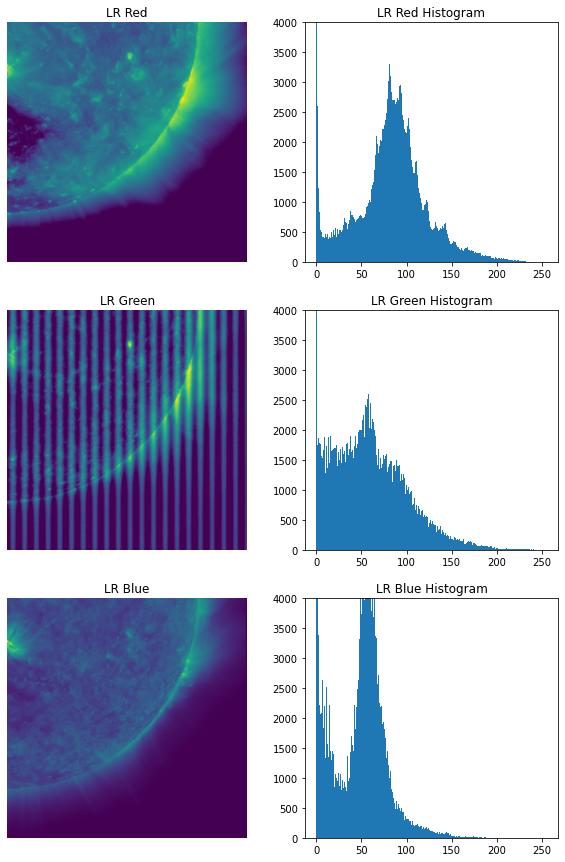

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
I_LR_R = I_LR[:,:,0]
I_LR_G = I_LR[:,:,1] 
I_LR_B  = I_LR[:,:,2]
plt.title("LR Red")
img=plt.imshow((I_LR_R).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,2)
plt.axis(ymax = 4000)
plt.title("LR Red Histogram")
hist=plt.hist(I_LR_R.flatten(),bins=256,range=(0,255))
plt.subplot(3,2,3)
plt.title("LR Green")
img=plt.imshow((I_LR_G).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,4)
plt.axis(ymax = 4000)
plt.title("LR Green Histogram")
hist=plt.hist(I_LR_G.flatten(),bins=256,range=(0,255))
plt.subplot(3,2,5)
plt.title("LR Blue")
img=plt.imshow((I_LR_B).astype(np.uint8)); plt.axis('off')
plt.subplot(3,2,6)
plt.axis(ymax = 4000)
plt.title("LR Blue Histogram")
hist=plt.hist(I_LR_B.flatten(),bins=256,range=(0,255))

## ***Part e-ii:*** In this section I analyize the cause of noise in each of the channels. From the histograms I didn't learn too much about the noise so I used spectrum analysis.

### ***LR Red:*** No noise in this channel

### ***LR Green:*** Suffering from periodic noise.  I can tell due to the regular interval that the bars in the image appear at. Below is the spectrum of the image. There is a lot circular shaped smears on both sides of the spectrum that are causing the bars seen in the image. These circles indicate that the noise is sinusoidal.

(-0.5, 1535.5, 1535.5, -0.5)

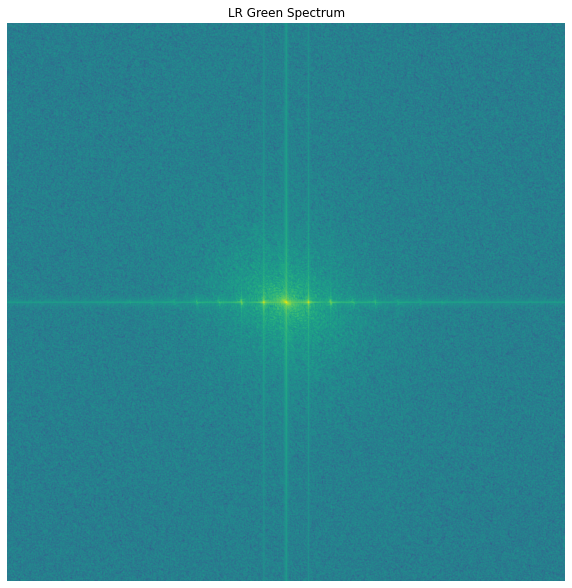

In [ ]:
plt.figure(figsize=(10,15))
I_LR_G_fft = np.pad(I_LR_G, (512,512))
I_LR_G_fft = np.fft.fft2(I_LR_G_fft)
I_LR_G_fft_plot = (np.log(1+abs(I_LR_G_fft)))
specy = np.fft.fftshift(I_LR_G_fft_plot)
plt.title("LR Green Spectrum")
img=plt.imshow( specy ); plt.axis("off")


It makes sense that these lines are on the horizontal axis because the noise manifest as vertical bars. This checks out with the behavior of lines when converting from spatial to frequency. 

### ***LR Blue:*** No noise in this channel

## ***Part e-iii:*** In this section I filter out the noise using low pass filters in the frequency domain. The first step was importing a function that creates low pass filters so that I could apply it to the image. Next I created a mask of these fliters and multiplied them by the spectrum. I chose large filters on the areas with issues because I wanted to ensure that the noise was compleltly covered.

In [ ]:
def gauss_lowpass(filter_size,filter_center,sigma):
  u,v = np.meshgrid(np.arange(0,filter_size[0]),np.arange(0,filter_size[1]))
  D = np.sqrt((u-filter_center[0])**2+(v-filter_center[1])**2)
  H = np.exp(-D**2/(2*sigma**2))
  H = 1-H
  return H


(-0.5, 511.5, 511.5, -0.5)

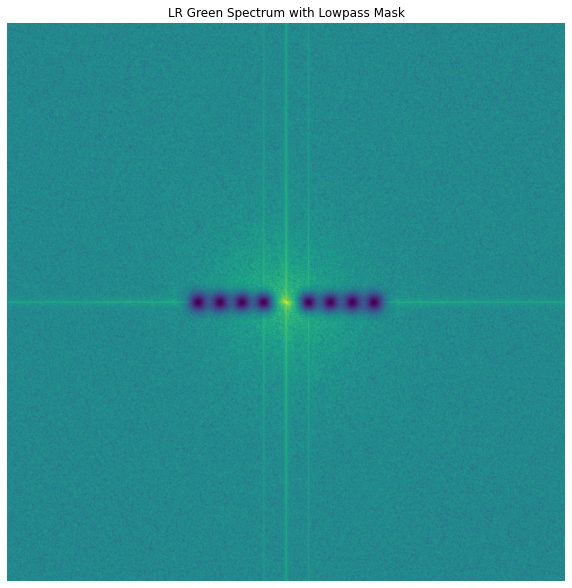

<Figure size 720x1080 with 0 Axes>

<Figure size 432x288 with 0 Axes>

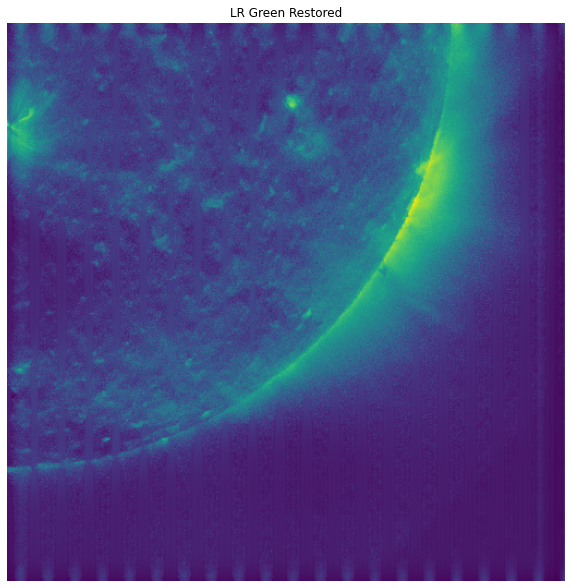

In [ ]:
I_LR_R = I_LR[:,:,0]
I_LR_G = I_LR[:,:,1]
I_LR_B = I_LR[:,:,2]

H0 = gauss_lowpass((1536,1536),(768,768),20)

H1 = gauss_lowpass((1536,1536),(706,768),20)
H2 = gauss_lowpass((1536,1536),(646,768),20)
H3 = gauss_lowpass((1536,1536),(586,768),20)
H4 = gauss_lowpass((1536,1536),(526,768),20)

H5 = gauss_lowpass((1536,1536),(1536-706,768),20)
H6 = gauss_lowpass((1536,1536),(1536-646,768),20)
H7 = gauss_lowpass((1536,1536),(1536-586,768),20)
H8 = gauss_lowpass((1536,1536),(1536-526,768),20)


plt.figure(figsize=(10,15))
I_LR_G_fft = np.pad(I_LR_G, (512,512))
I_LR_G_fft = np.fft.fft2(I_LR_G_fft)
I_LR_G_fft_plot = (np.log(1+abs(I_LR_G_fft)))
specy = np.fft.fftshift(I_LR_G_fft_plot)
H = H1 * H2 * H3 * H4 * H5 * H6 * H7 * H8 

mask = np.ones((len(specy),len(specy[0])))



I_LR_G_restored = np.real( np.fft.ifft2(I_LR_G_fft*H ) )
plt.title("LR Green Spectrum with Lowpass Mask")
img=plt.imshow( specy * H*mask); plt.axis("off")



I_LR_G_fft_plot = (np.log(1+abs(I_LR_G_fft)))
specy = np.fft.fftshift(I_LR_G_fft_plot)
plt.figure(figsize=(10,15))

plt.figure()

plt.figure(figsize=(10,15))
a = 1536/3

I_LR_G_restored = np.real(  np.fft.ifft2(np.fft.fftshift(H)*I_LR_G_fft) )
I_LR_G_restored = I_LR_G_restored[int(a):int(1536-a),int(a):int(1536-a)]
plt.title("LR Green Restored")

img=plt.imshow(I_LR_G_restored); plt.axis("off")

The result is pretty good, the image came out with the bars still somewhat present but the severity of them greatly reduced. These artifacts are noticable around the sides of the image and around the edges of the sun. 

## ***Part e-iv:*** In this section I stich togehter the RGB channels 

(-0.5, 511.5, 511.5, -0.5)

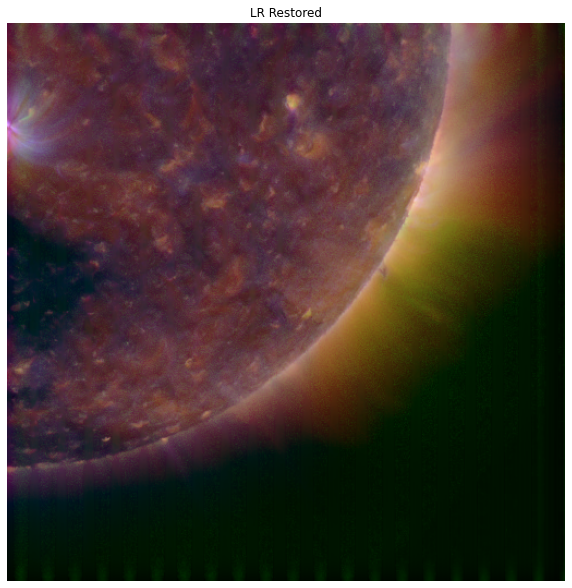

In [ ]:
plt.figure(figsize=(10,15))
plt.title("LR Restored")
I_LR_restored = np.zeros([512,512,3])
I_LR_restored[:,:,0]= I_LR_R
I_LR_restored[:,:,1]= I_LR_G_restored
I_LR_restored[:,:,2]= I_LR_B
img=plt.imshow((I_LR_restored).astype(np.uint8)); plt.axis('off')

The image has a green tint. Compared to the orginal the bars are mostly removed and other than the artifacts on the borders and tint the image looks close to the clean image. 

# **(f) Restored image:**

## Here is the restored image. I applied a median filter to all the channels to further enhnace the image.

(-0.5, 1023.5, 1023.5, -0.5)

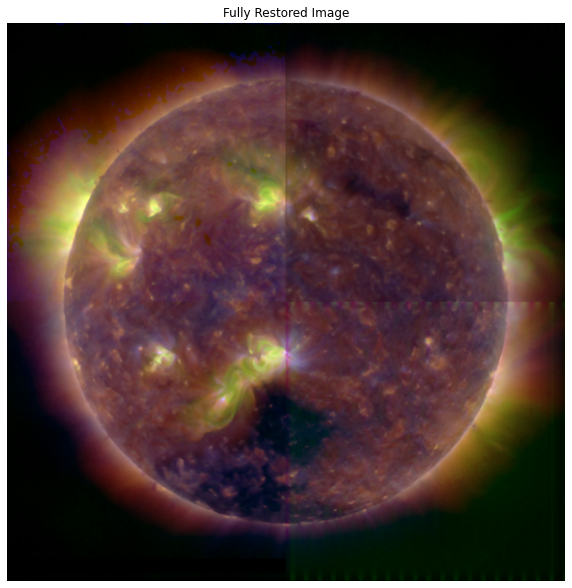

In [ ]:
plt.figure(figsize=(10,15))
plt.title("Restored Image")
I_restored = np.zeros((len(I),len(I[0]),3))
I_restored[0:512,0:512] = I_UL_restored
I_restored[0:512,512:1024] = I_UR_restored
I_restored[512:1024,0:512] = I_LL_restored
I_restored[0:512,512:1024] = I_UR_restored
I_restored[512:1024,512:1024] = I_LR_restored
I_restored[:,:,0] = median_filter(I_restored[:,:,0],3)
I_restored[:,:,1] = median_filter(I_restored[:,:,1],3)
I_restored[:,:,2] = median_filter(I_restored[:,:,2],3)
plt.title("Fully Restored Image")
img=plt.imshow((I_restored).astype(np.uint8)); plt.axis('off')


There are some artifacts around the border and there is the green tint in the corner, but other than that the noise has been reduced by a decent amount.

## ***Part g-i:*** In this section I create a techinque to detect the Coronal holes in this image of the sun. First step I take is to define the mask so I don't show values outside that are not Coronal holes. I also used the opposite of the mask to get the background and add it back in later. I used the color slicing function that I made in Homework 8 and defined a cube of width 30 centered at [10,10,10] in order to capture all of the dark values.

In [ ]:
def make_circle_mask(c,im_dims,r):    
    cx = c[0]
    cy = c[1]
    ix = im_dims[0]
    iy = im_dims[1]
    x,y = np.meshgrid(np.arange(-(cx),(ix-cx),1),np.arange(-(cy),(iy-cy),1))
    c_mask = (x**2+y**2)<=r**2 


    return c_mask

(-0.5, 1023.5, 1023.5, -0.5)

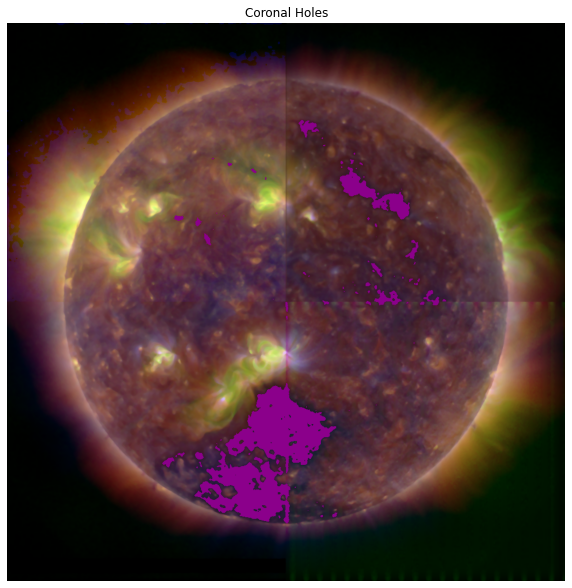

In [ ]:
red = 10
blue = 10
green = 10
W=30
plt.figure(figsize=(10,15))
plt.title("Coronal Holes")


c = make_circle_mask([512,512],[1024,1024],410)

colorslice1 = I_restored.copy()
Holes = np.ones([1024,1024,3])

for i in range(0,len(I)):
  for j in range(0,len(I[:,0])):
    if( ( abs( I_restored[i,j]-[red,green,blue])<([W/2,W/2,W/2]) ).any() ):
     blank[i,j] = [139,0,139]
     colorslice1[i,j] = [139,0,139]


background = np.zeros([1024,1024,3])
colorslice1[:,:,0] = colorslice1[:,:,0]*c
colorslice1[:,:,1] = colorslice1[:,:,1]*c
colorslice1[:,:,2] = colorslice1[:,:,2]*c
background[:,:,0] = I_restored[:,:,0]*(np.abs(1-c))
background[:,:,1] = I_restored[:,:,1]*(np.abs(1-c))
background[:,:,2] = I_restored[:,:,2]*(np.abs(1-c))
img=plt.imshow((colorslice1+background).astype(np.uint8)); plt.axis('off')



All the dark regions are higlighted purple and the mask stopped all the outside values from showing.

## ***Part g-ii:*** In this section I color slice out all of the bright regions and place it on the previous image. I used teh same technique as above but changed some limits to slice out the brighter portions.

(-0.5, 1023.5, 1023.5, -0.5)

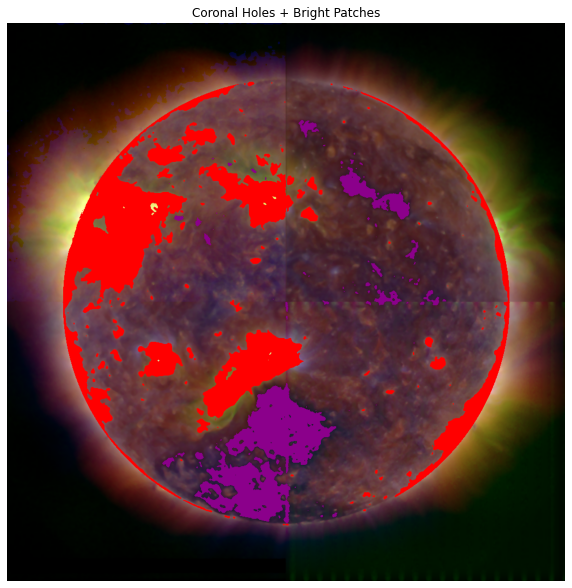

In [ ]:
plt.figure(figsize=(10,15))
plt.title("Coronal Holes + Bright Patches")
red = 175
blue = 220
green = 175
W=100
bright = np.zeros([1024,1024,3])
colorslice2 = colorslice1.copy()
for i in range(0,len(I)):
  for j in range(0,len(I[:,0])):
    if( ( abs( I_restored[i,j]-[red,green,blue])<([W/2,W/2,W/2]) ).any() ):
      colorslice2[i,j] = [255,0,0]
      blank[i,j] = [255,0,0]

colorslice2[:,:,0] = colorslice2[:,:,0]*c
colorslice2[:,:,1] = colorslice2[:,:,1]*c
colorslice2[:,:,2] = colorslice2[:,:,2]*c
img=plt.imshow((colorslice2+background).astype(np.uint8)); plt.axis('off')



Both the Coronal holes and bright areas have been highlighed. 

## ***Part g-iii:*** In this sectin I created the final image by starting with a reddish-orange and applied the two color slicing methods. I then applied the mask on the image and re-added the background.

(-0.5, 1023.5, 1023.5, -0.5)

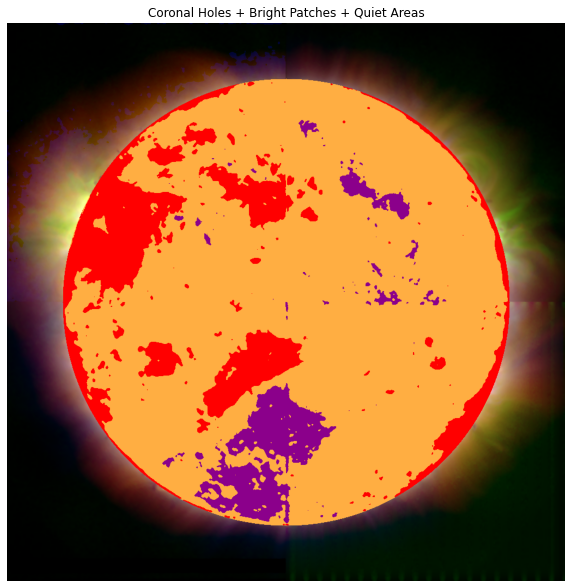

In [ ]:
plt.figure(figsize=(10,15))
plt.title("Coronal Holes + Bright Patches + Quiet Areas")

blank = np.zeros([1024,1024,3])



for i in range(0,len(I)):
  for j in range(0,len(I[:,0])):
    blank[i,j] = [255,174,66]

red = 10
blue = 10
green = 10
W=30


for i in range(0,len(I)):
  for j in range(0,len(I[:,0])):
    if( ( abs( I_restored[i,j]-[red,green,blue])<([W/2,W/2,W/2]) ).any() ):
     blank[i,j] = [139,0,139]

red = 175
blue = 220
green = 175
W=100

for i in range(0,len(I)):
  for j in range(0,len(I[:,0])):
    if( ( abs( I_restored[i,j]-[red,green,blue])<([W/2,W/2,W/2]) ).any() ):
      colorslice2[i,j] = [255,0,0]
      blank[i,j] = [255,0,0]

blank[:,:,0] = blank[:,:,0]*c
blank[:,:,1] = blank[:,:,1]*c
blank[:,:,2] = blank[:,:,2]*c


img=plt.imshow((blank+background).astype(np.uint8),vmin = 0,vmax = 255); plt.axis('off')
